In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bhp.csv')
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
mini, maxi = data.total_sqft.quantile([0.001,0.999])
mini,maxi

(319.975, 11978.110000000142)

In [9]:
data_percentile = data[(data.total_sqft>mini) & (data.total_sqft<maxi)].copy()
data_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
data_percentile['zscore'] = (data_percentile.total_sqft-data_percentile.total_sqft.mean())/data_percentile.total_sqft.std()
data_percentile.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.539047
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,1.209970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.104058
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.012303
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.375926


In [11]:
data_zscore = data_percentile[(data_percentile.zscore<4) & (data_percentile.zscore>-4)]
data_zscore.shape

(13061, 8)

In [12]:
mini = data_percentile.total_sqft.mean()-4*data_percentile.total_sqft.std()
maxi = data_percentile.total_sqft.mean()+4*data_percentile.total_sqft.std()
print(mini,maxi)
data_4std = data_percentile[(data_percentile.total_sqft>mini) & (data_percentile.total_sqft<maxi)]
data_4std.shape

-1999.2659374139066 5062.987427696324


(13061, 8)

In [20]:
from scipy.stats import norm
import numpy as np

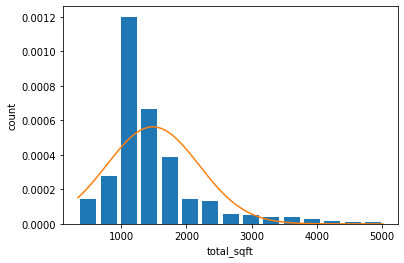

In [34]:
plt.hist(data_zscore.total_sqft,bins=15,rwidth=0.8,density=True)
plt.xlabel('total_sqft')
plt.ylabel('count')

rng = np.arange(data_zscore.total_sqft.min(),data_zscore.total_sqft.max(),10)
# print(rng,data_zscore.total_sqft.mean(),data_zscore.total_sqft.std())
plt.plot(rng,norm.pdf(rng,data_zscore.total_sqft.mean(),data_zscore.total_sqft.std()))

In [36]:
data.shape,data_zscore.shape,data_percentile.shape

((13200, 7), (13061, 8), (13172, 8))